# Pen-and-paper

In [7]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

### Data

In [8]:
X = pd.DataFrame([0.8, 1, 1.2, 1.4, 1.6])
y = pd.DataFrame([24, 20, 10, 13, 12])

### Ecercício 1

In [9]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X.values.reshape(-1, 1))
reg = Ridge(alpha=2).fit(X_poly, y)

print(reg.intercept_ ,reg.coef_)

[22.25054] [[-0.76265622 -1.36589303 -1.7158706 ]]


### Exercício 2

In [10]:
y_pred = reg.predict(X_poly)

print('Training RMSE:', np.sqrt(mean_squared_error(y, y_pred)))
print(y_pred)

Training RMSE: 3.5587904655686162
[[19.88771774]
 [18.40612015]
 [16.40344218]
 [13.79732203]
 [10.50539791]]


### Exercício 3 (undoable)

### Calculations

In [11]:
poly = PolynomialFeatures(degree=3, include_bias=True)

matrix_x = poly.fit_transform(X.values.reshape(-1, 1))
matrix_z = y.values
matrix_lambda = 2 * np.identity(4)

inv = np.linalg.inv(np.matmul(matrix_x.transpose(), matrix_x) + matrix_lambda)
w = np.matmul(np.matmul(inv, matrix_x.transpose()), matrix_z)
print(w)    #TODO: wrong result

y_manual = []
for x in X.values:
    y_manual.append(w[0][0] + w[1][0]*x + w[2][0]*(x**2) + w[3][0]*(x**3))


[[ 7.0450759 ]
 [ 4.64092765]
 [ 1.96734046]
 [-1.30088142]]


### Graph

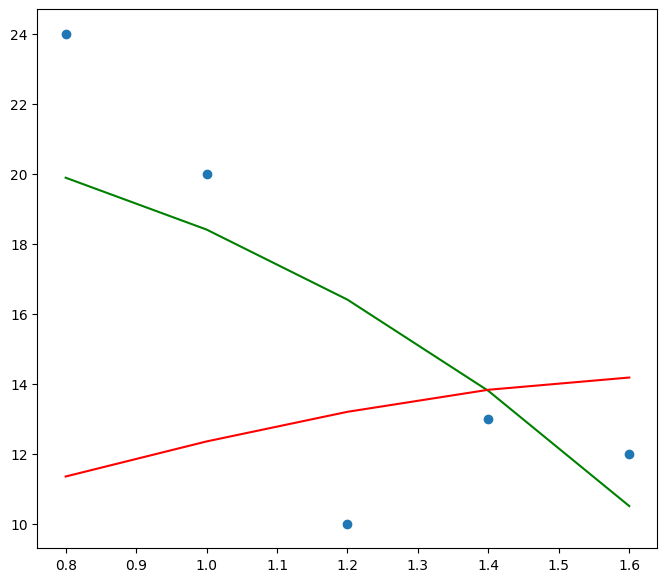

In [12]:
plt.figure(figsize=(8, 7))
plt.scatter(X, y)
plt.plot(X, y_pred, c='green')  # Computed result
plt.plot(X, y_manual, c='red')  # Manual result
plt.show()